# Шаталин Александр
## Рабочая тетрадь 6

### 1.1 Задание

In [243]:
def chromosome_quality(x, y):
    return (x - 3*y + 1) / (3*x**2 + 3*y**2 + 1)

In [244]:
def exchange_scheme(old_x, old_y, sorted_id):
    x_chromosome = [0 for i in range(4)]
    y_chromosome = x_chromosome[:]

    x_chromosome[2] = old_x[sorted_id[2]]
    x_chromosome[3] = old_x[sorted_id[2]]

    x_chromosome[0] = old_x[sorted_id[0]]

    x_chromosome[1] = old_x[sorted_id[1]]

    y_chromosome[2] = old_y[sorted_id[2]]
    y_chromosome[3] = old_y[sorted_id[2]]

    y_chromosome[0] = old_y[sorted_id[0]]

    y_chromosome[1] = old_y[sorted_id[1]]

    return x_chromosome, y_chromosome

In [245]:
def sorting(quality_array):
    sorted_id = sorted(range(len(quality_array)), key=lambda k: quality_array[k])

    return sorted_id

In [246]:
def evolution_step(X, Y, Z):
    _, min_id = min((value, id) for (id, value) in enumerate(Z))
    
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(min_id)
    Y.pop(min_id)
    Z.pop(min_id)

    return X, Y, Z

In [247]:
def evolution(X, Y, steps_amount=4):
    results = []

    for i in range(steps_amount):
        arr_z = [chromosome_quality(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evolution_step(X, Y, arr_z)

        X, Y = exchange_scheme(X, Y, sorting(Z))

        results.append([X, Y, sum(arr_z), arr_z])

    return X, Y, results

In [248]:
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

results = evolution(X, Y, steps_amount=10)

In [249]:
for i in range(len(results[2])):
    print(f'max in {i+1} step: {results[2][i][2]}')

quality_array = []
for i in range(len(results[2])):
    quality_array += results[2][i][3]

print(f'max in quality array: {max(quality_array)}')

max in 1 step: 1.4857142857142858
max in 2 step: 2.6285714285714286
max in 3 step: 3.428571428571429
max in 4 step: 4.0
max in 5 step: 4.0
max in 6 step: 4.0
max in 7 step: 4.0
max in 8 step: 4.0
max in 9 step: 4.0
max in 10 step: 4.0
max in quality array: 1.0


### 1.2.1 Задание

In [250]:
import networkx as nx
from math import e

In [251]:
distances = [
    (1, 2, 20), 
    (1, 3, 40),
    (1, 4, 42),
    (1, 5, 33),
    (1, 6, 21),
    (2, 3, 26),
    (2, 4, 38),
    (2, 5, 42),
    (2, 6, 17),
    (3, 4, 22),
    (3, 5, 43),
    (3, 6, 21),
    (4, 5, 27),
    (4, 6, 22),
    (5, 6, 26)
    ]

V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4), (4, 6), (5, 2), (6, 2)] # последовательность замен вершин
P = [49, 54, 43, 54] # случайные числа, выпавшие в процессе счёта
T = 100 # начальная температура

In [252]:
def probability(delta, T):
    return 100 * e ** (-delta / T)

In [253]:
def reduct_temp(previous_temp):
    return 0.5 * previous_temp

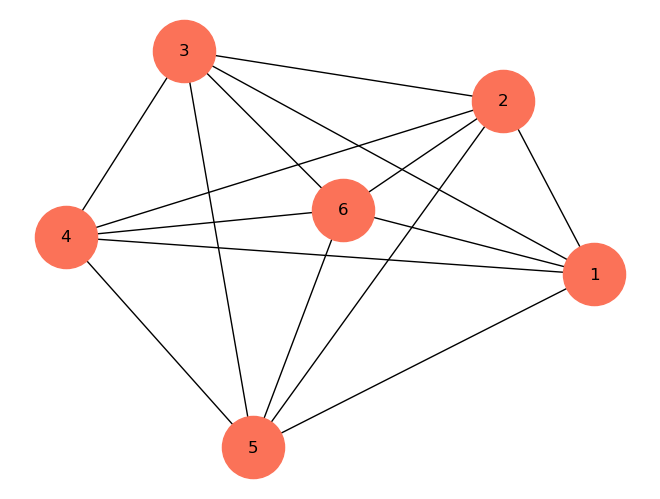

In [254]:
graph = nx.Graph() # создание пустого графа
graph.add_weighted_edges_from(distances) # добавление весов рёбер
# отрисовка графа с заданными вершинами
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [255]:
# вычисление длины ребра
def edge_length(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) 
        for item in distances])
    else:
        return max([ (item[2] if (item[0] == i and item [1] == j) else -1) for item in distances])

In [256]:
# вычисление длины маршрута
def route_length(V, distances):
    edges = []
    for i in range(len (V) - 1):
        edges.append(edge_length(V[i], V[i + 1], distances))
    return sum(edges)

In [257]:
# одна перестановка в пути
def routeOneReplacement (arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

In [258]:
# перестановки в пути
def routeReplacement (V, Z):
    for z in Z:
        V = routeOneReplacement (V, z)
    return V

In [259]:
# выбор нужного пути методом отжига
def chooseRoute (distances, V, Z, T, P):
    sumLength = route_length(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин
    # циклы методом отжига
    for i in range(len(Z)):
        newV = routeOneReplacement (V[:], Z[i]) # новый маршрут после перестановки
        newS = route_length(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltas = newS - sumLength # разница между длиной нового и старого маршрутов
        # в случае, если разница между длинами больше 0, то вычисляется вероятность
        if deltas > 0:
            p = probability(deltas, T) # подсчёт вероятности
            # если заданная вероятность попадает в интервал от 0 до р, то новый маршрут Выбирается
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reduct_temp (T) # вычисление температуры
    return V, arrSum

In [260]:
# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    # прохождение по вектору
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute [i] and distance [1] == bestRoute[i + 1] or distance [1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    
    graph = nx.Graph() # создание пустого графа
    graph.add_weighted_edges_from(newDistances) # добавление весов рёбер
    # отрисовка графа с заданными вершинами
    nx.draw_kamada_kawai (graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [261]:
graph = nx.Graph() # создание пустого графа

 Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


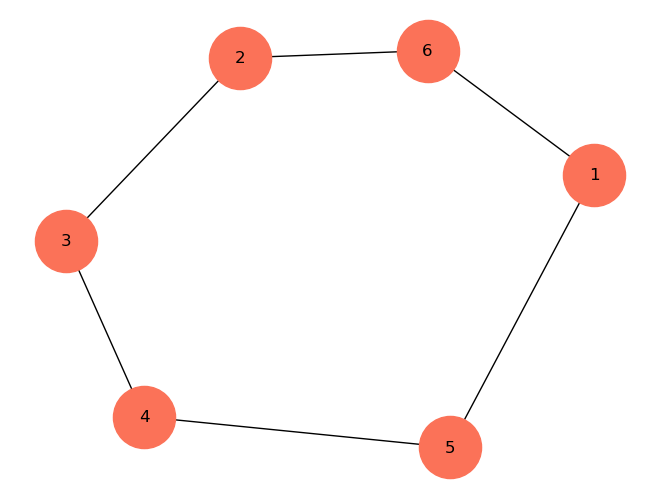

In [262]:
bestRoute, arr_length = chooseRoute(distances, V, Z, T, P)
print(f' Лучший выбранный маршрут: {bestRoute}')
print (f'Длина лучшего выбранного маршрута: {route_length (bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arr_length}')
drawRouteGraph (distances, bestRoute) # отрисовка лучшего маршрута